In [13]:
# https://leetcode.com/problems/find-the-shortest-superstring/description/

Based on Travelling Salesperson

https://www.youtube.com/watch?v=XaXsJJh-Q5Y

![Screenshot 2024-01-12 at 4.59.39 PM.png](<attachment:Screenshot 2024-01-12 at 4.59.39 PM.png>)
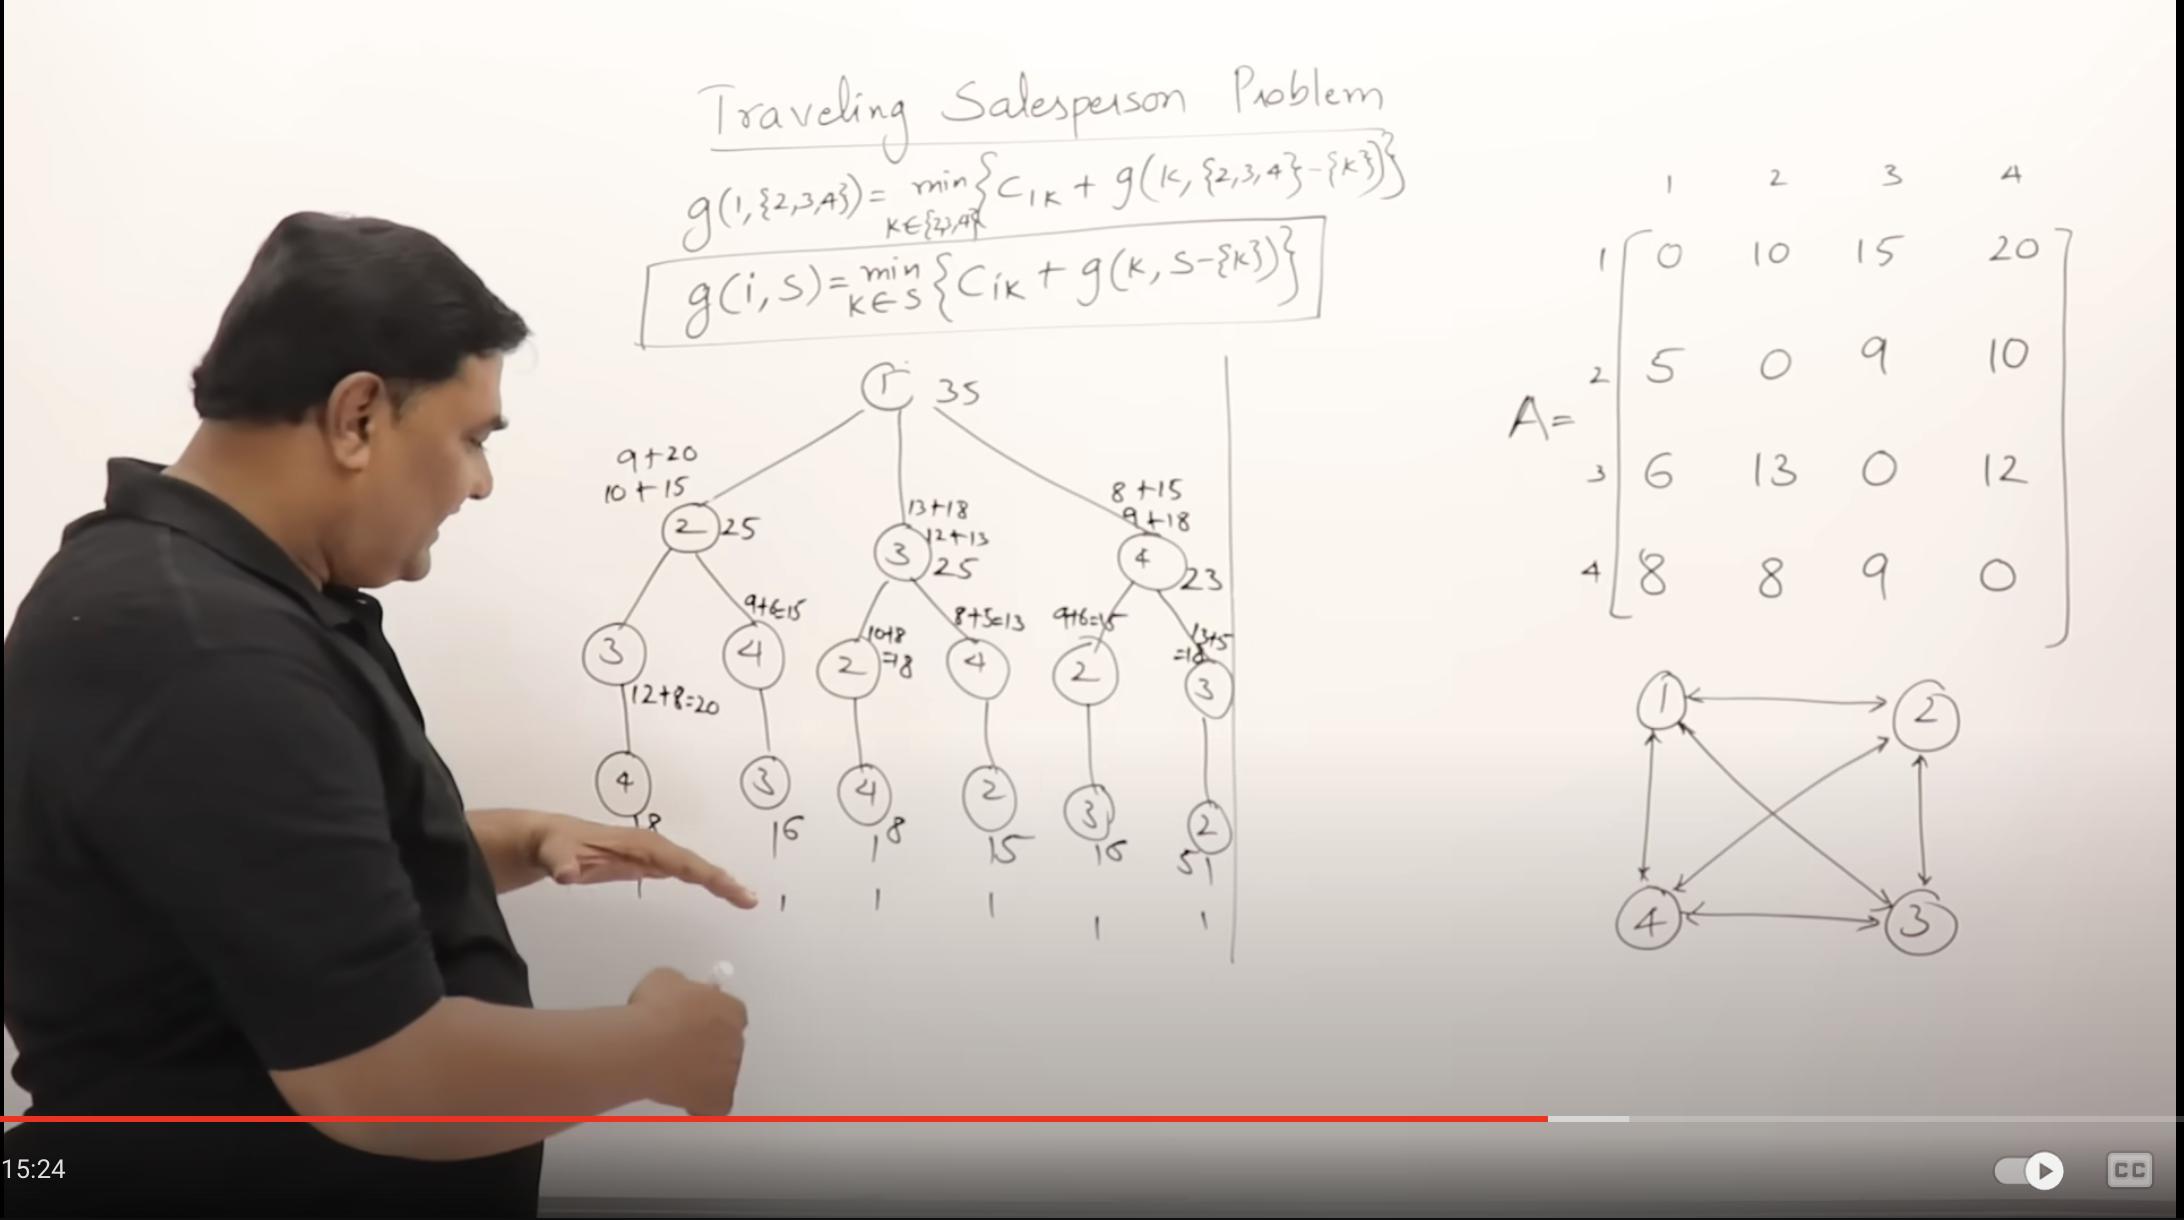

In [14]:
from typing import List

class Solution:
    def shortestSuperstring(self, words: List[str]) -> str:
        def getCost(s1: str, s2: str):
            for i in range(len(s1)):
                if s2.startswith(s1[i:]):
                    return len(s2) - (len(s1) - i)
            return len(s2)
        n = len(words)
        graph = [[0] * n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                graph[i][j] = getCost(words[i], words[j])
                graph[j][i] = getCost(words[j], words[i])
        dp = {}
        # mask keeps track of which element has been already visited in the path
        # so instead of a set, we use mask
        def search(i, mask):
            if mask == (1<<n)-1:
                return 0, [i]
            key = (i, mask)
            if key in dp:
                return dp[key]
            min_cost = float('inf')
            min_path = []
            for j in range(n):
                if (mask&(1<<j)) == 0:
                    cur_cost, cur_path = search(j, mask|(1<<j))
                    cur_cost += graph[i][j]
                    if cur_cost < min_cost:
                        min_cost = cur_cost
                        min_path = cur_path
            dp[key] = min_cost, [i] + min_path 
            # we return the path from current node till end
            return dp[key]
        overall_min_cost = float('inf')
        final_path = []
        for i in range(n):
            cur_cost, cur_path = search(i, 1 << i)
            cur_cost += len(words[i])
            if cur_cost < overall_min_cost:
                overall_min_cost = cur_cost
                final_path = cur_path
        ans = ""
        for i in range(len(final_path)):
            next_word = words[final_path[i]]
            if i == 0:
                ans += next_word
            else:
                cost = graph[final_path[i-1]][final_path[i]]
                ans += next_word[len(next_word) - cost:]
        return ans

In [15]:
from typing import List

class Solution:
    def shortestSuperstring(self, words: List[str]) -> str:
        def getCost(s1: str, s2: str):
            for i in range(len(s1)):
                if s2.startswith(s1[i:]):
                    return len(s2) - (len(s1) - i)
            return len(s2)
        n = len(words)
        graph = [[0] * n for _ in range(n)]
        for i in range(n):
            for j in range(n):
                graph[i][j] = getCost(words[i], words[j])
                graph[j][i] = getCost(words[j], words[i])

        dp = {}
        # mask keeps track of which element has been already visited in the path
        # so instead of a set, we use mask
        def search(i, mask):
            if mask == (1<<n)-1:
                return 0, [i]
            key = (i, mask)
            if key in dp:
                return dp[key]
            min_cost = float('inf')
            min_path = []
            for j in range(n):
                if (mask&(1<<j)) == 0:
                    cur_cost, cur_path = search(j, mask|(1<<j))
                    if i == -1:
                        cur_cost += len(words[j])
                    else:
                        cur_cost += graph[i][j]
                    
                    if cur_cost < min_cost:
                        min_cost = cur_cost
                        min_path = cur_path
            if i != -1:
                min_path = [i] + min_path
            dp[key] = min_cost, min_path
            # we return the path from current node till end
            return dp[key]
        overall_min_cost, final_path = search(-1, 0)
        ans = ""
        for i in range(len(final_path)):
            next_word = words[final_path[i]]
            if i == 0:
                ans += next_word
            else:
                cost = graph[final_path[i-1]][final_path[i]]
                ans += next_word[len(next_word) - cost:]
        return ans

In [16]:
words = ["alex","loves","leetcode"]
sol = Solution()
sol.shortestSuperstring(words)

'alexlovesleetcode'

In [17]:
words = ["catg","ctaagt","gcta","ttca","atgcatc"]
sol = Solution()
sol.shortestSuperstring(words)

'gctaagttcatgcatc'

In [18]:
words = ["gnwvaraecglrhxsggyai","raecglrhxsggyaifdn","bliwndhvprmozdduzzxm","kvokzckhugsdzbmnf","ykjkggnwvaraecglr","sdzbmnfykeywf","dhvprmozdduzzxms","ggyaifdnbliwndh","yaifdnbliwndhvprmoz","mskvokzckhugsdzbm"]
sol = Solution()
sol.shortestSuperstring(words)

'ykjkggnwvaraecglrhxsggyaifdnbliwndhvprmozdduzzxmskvokzckhugsdzbmnfykeywf'